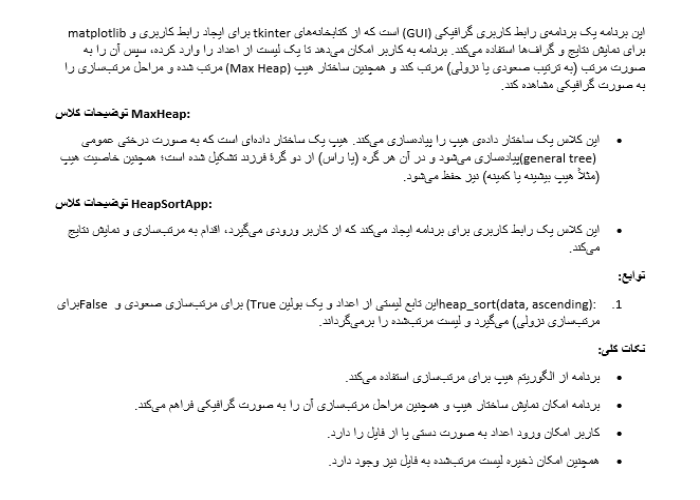

In [21]:
import cv2
from google.colab.patches import cv2_imshow # Import the Colab patch for cv2.imshow()

image_path = '/content/dis.png'
img = cv2.imread(image_path)

desired_size = (700, 500)
resized_img = cv2.resize(img, desired_size)

cv2_imshow(resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
!pip install seaborn matplotlib networkx numpy

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Hp\anaconda3\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Hp\AppData\Local\Temp\ipykernel_16776\2143641441.py", line 199, in sort_numbers
    sorted_list = heap_sort(input_numbers, ascending)  # Replace with actual implementation
                  ^^^^^^^^^
NameError: name 'heap_sort' is not defined


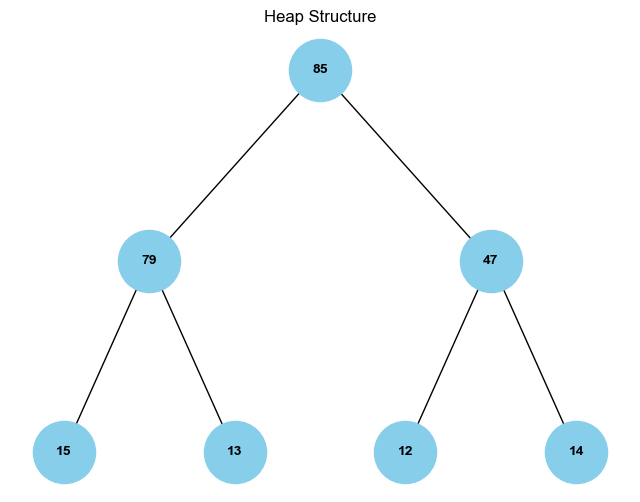

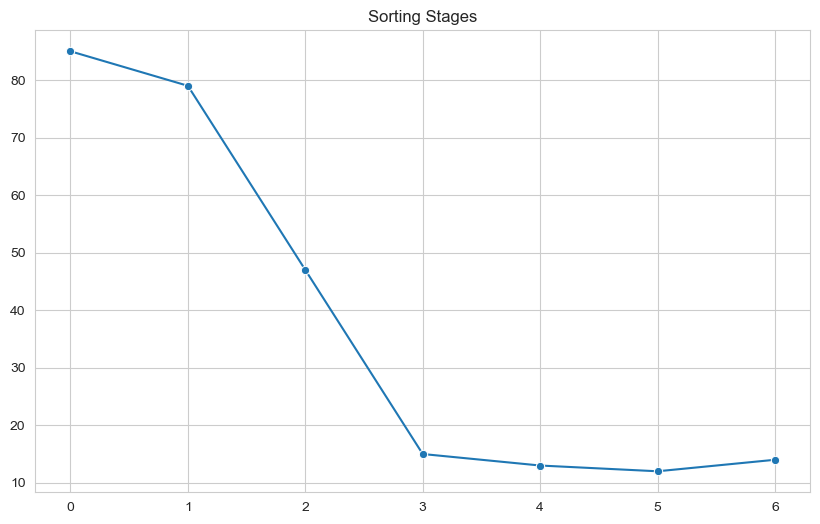

In [ ]:
import tkinter as tk
from tkinter import messagebox, ttk, filedialog
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import networkx as nx
import numpy as np

class MaxHeap:
    def __init__(self):
        self.heap = [0]  # the zero'th is redundant

    def size(self):
        return len(self.heap) - 1

    def parent(self, i):
        return i // 2

    def left_child(self, i):
        return 2 * i

    def right_child(self, i):
        return 2 * i + 1

    def get_node_value(self, i):
        if i <= 0 or i > self.size():
            raise IndexError("Invalid node index")
        return self.heap[i]

    def set_node_value(self, i, value):
        if i <= 0 or i > self.size():
            raise IndexError("Invalid node index")
        self.heap[i] = value

    def bubble_down(self, i):
        while self.left_child(i) <= self.size():
            new_ind = i
            left = self.left_child(i)
            right = self.right_child(i)
            if self.get_node_value(left) > self.get_node_value(i):
                new_ind = left
            if right <= self.size() and self.get_node_value(right) > self.get_node_value(new_ind):
                new_ind = right
            if i == new_ind:
                break
            self.heap[i], self.heap[new_ind] = self.heap[new_ind], self.heap[i]
            i = new_ind

    def bubble_up(self, i):
        while i > 1 and self.get_node_value(i) > self.get_node_value(self.parent(i)):
            self.heap[i], self.heap[self.parent(i)] = self.heap[self.parent(i)], self.heap[i]
            i = self.parent(i)

    def insert(self, item):
        self.heap.append(item)
        self.bubble_up(self.size())

    def get_max(self):
        if self.size() == 0:
            raise IndexError("Heap is empty")
        return self.get_node_value(1)

    def del_max(self):
        if self.size() == 0:
            raise IndexError("Heap is empty")
        max_value = self.get_node_value(1)
        self.heap[1] = self.heap[self.size()]
        self.heap.pop()
        self.bubble_down(1)
        return max_value

    def build_heap(self, L):
        self.heap = [0] + L
        for i in range(self.size() // 2, 0, -1):
            self.bubble_down(i)

    def clear(self):
        self.heap = [0]

    def print_heap(self):
        print("Heap:")
        for i in range(1, self.size() + 1):
            print(f"[Node {i}] = {self.get_node_value(i)}")

    def display_heap(self, canvas_frame):
        self._display_heap_structure(canvas_frame)

    def _display_heap_structure(self, canvas_frame):
        heap = self.heap[1:]  # Exclude the redundant zero'th element

        # Create a networkx graph
        G = nx.Graph()
        positions = {}

        def add_edges_and_positions(i, posx, posy, layer_width):
            if i <= self.size():
                G.add_node(i, label=self.get_node_value(i))
                positions[i] = (posx, posy)
                left = self.left_child(i)
                right = self.right_child(i)
                if left <= self.size():
                    G.add_edge(i, left)
                    add_edges_and_positions(left, posx - layer_width / 2, posy - 1, layer_width / 2)
                if right <= self.size():
                    G.add_edge(i, right)
                    add_edges_and_positions(right, posx + layer_width / 2, posy - 1, layer_width / 2)

        add_edges_and_positions(1, 0, 0, 8)  # Start from the root at the center

        # Draw the graph
        fig, ax = plt.subplots(figsize=(10, 6))
        nx.draw(G, pos=positions, with_labels=True, labels=nx.get_node_attributes(G, 'label'),
                node_size=2000, node_color='skyblue', font_size=10, font_weight='bold', font_color='black', ax=ax)
        ax.set_title("Heap Structure")

        # Display the plot in the canvas
        canvas = FigureCanvasTkAgg(fig, master=canvas_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

    def display_sorting_stages(self, canvas_frame):
        sns.set_style("whitegrid")
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.set_title("Sorting Stages")
        stages = []
        heap_copy = self.heap[1:]  # Copy of the heap, excluding the redundant

        max_heap = MaxHeap()
        max_heap.build_heap(heap_copy)

        while max_heap.size() > 0:
            stages.append(list(max_heap.heap[1:]))  # Append a copy of the current heap
            max_heap.del_max()  # Delete the max element to proceed to the next stage
        for stage in stages:
            sns.lineplot(data=stage, marker="o", ax=ax)  # Plot the current stage
            fig.canvas.draw()  # Update the canvas
            plt.pause(1)  # Pause for 1 second before displaying the next stage

        # Display the plot in the canvas
        canvas = FigureCanvasTkAgg(fig, master=canvas_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

class HeapSortApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Heap Sort with Tkinter")
        self.root.geometry("500x400")
        self.root.resizable(False, False)

        self.main_frame = ttk.Frame(root, padding="10")
        self.main_frame.pack(fill=tk.BOTH, expand=True)

        self.create_widgets()

    def create_widgets(self):
        input_label = ttk.Label(self.main_frame, text="Enter numbers separated by spaces:")
        input_label.grid(row=0, column=0, padx=5, pady=5, sticky=tk.W)

        self.input_entry = ttk.Entry(self.main_frame, width=50)
        self.input_entry.grid(row=0, column=1, padx=5, pady=5)

        self.sort_order_var = tk.StringVar(value='asc')
        asc_radio = ttk.Radiobutton(self.main_frame, text="Ascending", variable=self.sort_order_var, value='asc')
        asc_radio.grid(row=1, column=0, padx=5, pady=5, sticky=tk.W)

        desc_radio = ttk.Radiobutton(self.main_frame, text="Descending", variable=self.sort_order_var, value='desc')
        desc_radio.grid(row=1, column=1, padx=5, pady=5, sticky=tk.W)

        sort_button = ttk.Button(self.main_frame, text="Sort", command=self.sort_numbers)
        sort_button.grid(row=2, column=0, columnspan=2, pady=10)

        display_button = ttk.Button(self.main_frame, text="Display Heap", command=self.display_heap_structure)
        display_button.grid(row=3, column=0, columnspan=2, pady=10)

        display_stages_button = ttk.Button(self.main_frame, text="Display Sorting Stages", command=self.display_sorting_stages_wrapper)
        display_stages_button.grid(row=4, column=0, columnspan=2, pady=10)

        save_button = ttk.Button(self.main_frame, text="Save Sorted List", command=self.save_sorted_list)
        save_button.grid(row=5, column=0, padx=5, pady=5, sticky=tk.W)

        load_button = ttk.Button(self.main_frame, text="Load Numbers from File", command=self.load_numbers_from_file)
        load_button.grid(row=5, column=1, padx=5, pady=5, sticky=tk.E)

        self.result_label = ttk.Label(self.main_frame, text="")
        self.result_label.grid(row=6, column=0, columnspan=2, pady=5)

        clear_button = ttk.Button(self.main_frame, text="Clear", command=self.clear_input)
        clear_button.grid(row=7, column=0, columnspan=2, pady=10)

        info_label = ttk.Label(self.main_frame, text="Please enter a list of integers separated by spaces and select the sort order.")
        info_label.grid(row=8, column=0, columnspan=2, pady=10)

    def sort_numbers(self):
        try:
            input_numbers = list(map(int, self.input_entry.get().split()))
            sort_order = self.sort_order_var.get()
            ascending = sort_order == 'asc'
            sorted_list = heap_sort(input_numbers, ascending)  # Replace with actual implementation
            self.result_label.config(text=f"Sorted list: {sorted_list}")
        except ValueError:
            messagebox.showerror("Invalid input", "Please enter a valid list of numbers separated by spaces.")
        except IndexError as e:
            messagebox.showerror("Error", str(e))

    def display_heap_structure(self):
        try:
            input_numbers = list(map(int, self.input_entry.get().split()))
            max_heap = MaxHeap()
            max_heap.build_heap(input_numbers)
            self._open_new_window(max_heap.display_heap)
        except ValueError:
            messagebox.showerror("Invalid input", "Please enter a valid list of numbers separated by spaces.")
        except IndexError as e:
            messagebox.showerror("Error", str(e))

    def display_sorting_stages_wrapper(self):
        try:
            input_numbers = list(map(int, self.input_entry.get().split()))
            max_heap = MaxHeap()
            max_heap.build_heap(input_numbers)
            self._open_new_window(max_heap.display_sorting_stages)
        except ValueError:
            messagebox.showerror("Invalid input", "Please enter a valid list of numbers separated by spaces.")
        except IndexError as e:
            messagebox.showerror("Error", str(e))

    def _open_new_window(self, display_function):
        new_window = tk.Toplevel(self.root)
        new_window.title("Heap Visualization")
        new_window.geometry("800x600")

        canvas_frame = ttk.Frame(new_window)
        canvas_frame.pack(fill=tk.BOTH, expand=True)

        display_function(canvas_frame)

    def save_sorted_list(self):
        sorted_list_text = self.result_label.cget("text").split(":")[1].strip()
        if not sorted_list_text:
            messagebox.showerror("Error", "There is no sorted list to save.")
            return

        file_path = filedialog.asksaveasfilename(defaultextension=".txt", filetypes=[("Text files", "*.txt")])
        if file_path:
            with open(file_path, "w") as file:
                file.write(sorted_list_text)
            messagebox.showinfo("Saved", "Sorted list saved successfully.")

    def load_numbers_from_file(self):
        file_path = filedialog.askopenfilename(defaultextension=".txt", filetypes=[("Text files", "*.txt")])
        if file_path:
            with open(file_path, "r") as file:
                numbers = file.read().strip()
            self.input_entry.delete(0, tk.END)
            self.input_entry.insert(0, numbers)

    def clear_input(self):
        self.input_entry.delete(0, tk.END)
        self.result_label.config(text="")  # Clear result label on clearing input

if __name__ == "__main__":
    root = tk.Tk()
    app = HeapSortApp(root)
    root.mainloop()

# Placeholder implementation for heap_sort (replace with actual logic)
def heap_sort(data, ascending):
    max_heap = MaxHeap()
    max_heap.build_heap(data)
    sorted_list = []
    while max_heap.size() > 0:
        sorted_list.append(max_heap.del_max())
    if not ascending:
        sorted_list.reverse()  # Reverse for descending order
    return sorted_list


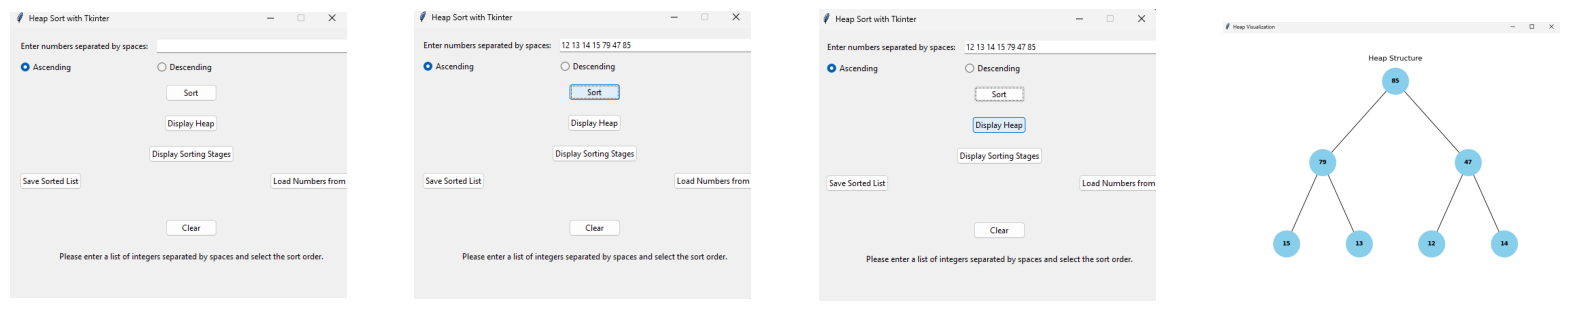

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

image_paths = ['/content/1.png', '/content/2.png', '/content/3.png', '/content/4.png', ]

fig, axs = plt.subplots(1, 4, figsize=(20, 20))

for ax, img_path in zip(axs, image_paths):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')
plt.show()


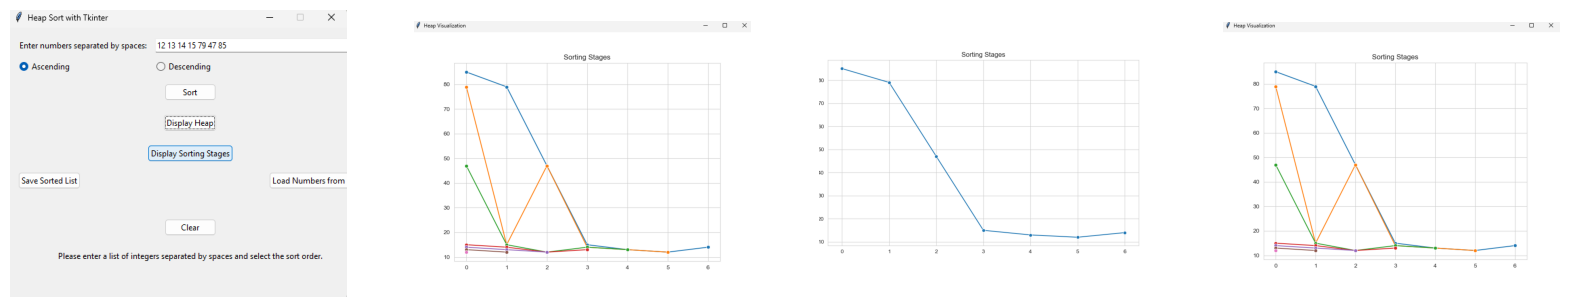

In [7]:
 image_paths = ['/content/5.png' , '/content/6.png' , '/content/7.png' , '/content/8.png' ,]

fig, axs = plt.subplots(1, 4, figsize=(20, 20))

for ax, img_path in zip(axs, image_paths):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')
plt.show()

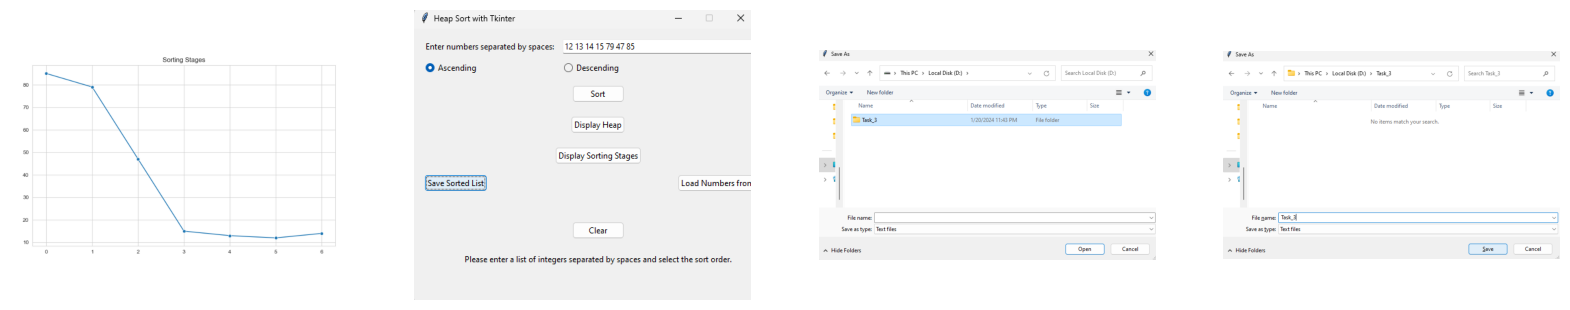

In [9]:
 image_paths = [ '/content/9.png' , '/content/10.png' , '/content/11.png' , '/content/12.png' ,]

fig, axs = plt.subplots(1,4, figsize=(20, 20))

for ax, img_path in zip(axs, image_paths):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')
plt.show()

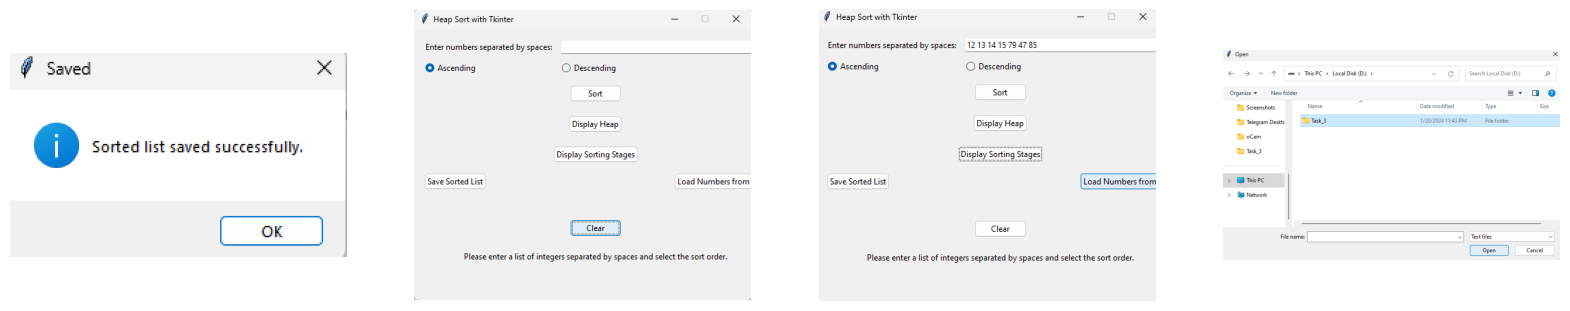

In [10]:
 image_paths = [ '/content/13.png' , '/content/14.png' , '/content/15.png' , '/content/16.png' ,]

fig, axs = plt.subplots(1, 4, figsize=(20, 20))

for ax, img_path in zip(axs, image_paths):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')
plt.show()

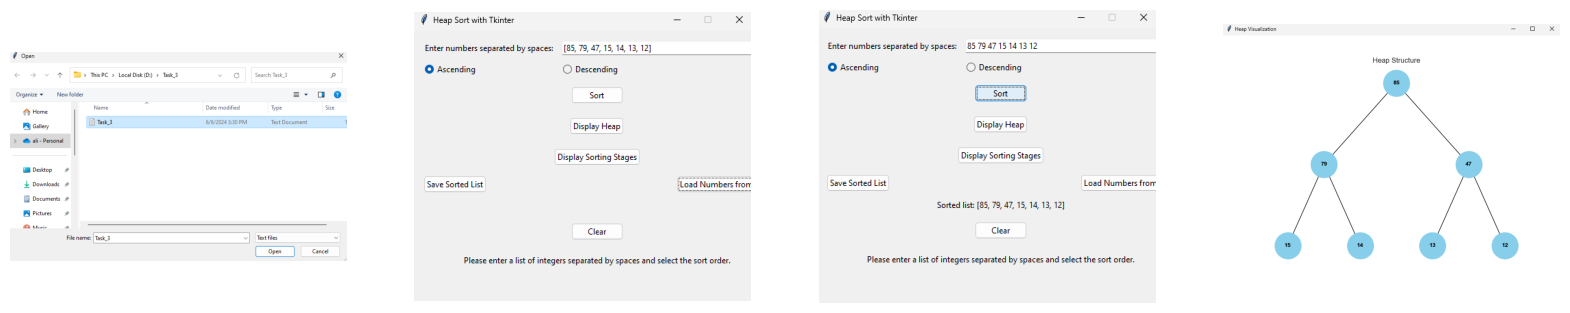

In [13]:
 image_paths = [ '/content/17.png' , '/content/18.png' , '/content/19.png' ,  '/content/20.png' , ]

fig, axs = plt.subplots(1, 4, figsize=(20, 20))

for ax, img_path in zip(axs, image_paths):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')
plt.show()